In [1]:
%pylab inline
import numpy as np
import netCDF4 as netCDF  # file format
import tracpy
import tracpy.plotting
from tracpy.tracpy_class import Tracpy
from itertools import compress  # seeing which drifters leave the domain
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import tracpy.op as op
#import os
matplotlib.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [7]:
lons = {}
lats = {}

for year in range(1994,2001):
    for day in range(1,32):
        fname = "tracks/" + str(day) + "July" + str(year) + ".nc"
        d = netCDF.Dataset(fname)
        lonp = d['lonp'][:]   # lonp[drifter][hour]
        latp = d['latp'][:]
        lon, lat = tracpy.tools.find_final(lonp,latp)   # final location
        
        if day == 1:
            lons[year] = []
            lats[year] = []
        
        lons[year] += lon
        lats[year] += lat

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/opt/tracpy/tracpy/tools.py:214: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  xpc.append(xp[idrift, find(ind3)[ind]])
/opt/tracpy/tracpy/tools.py:215: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  ypc.append(yp[idrift, find(ind3)[ind]])
/opt/tracpy/tracpy/tools.py:210: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  xpc.append(xp[idrift, find(ind3)[ind]])
/opt/tracpy/tracpy/tools.py:211: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  ypc.append(yp[idrift, find(ind3)[ind]])


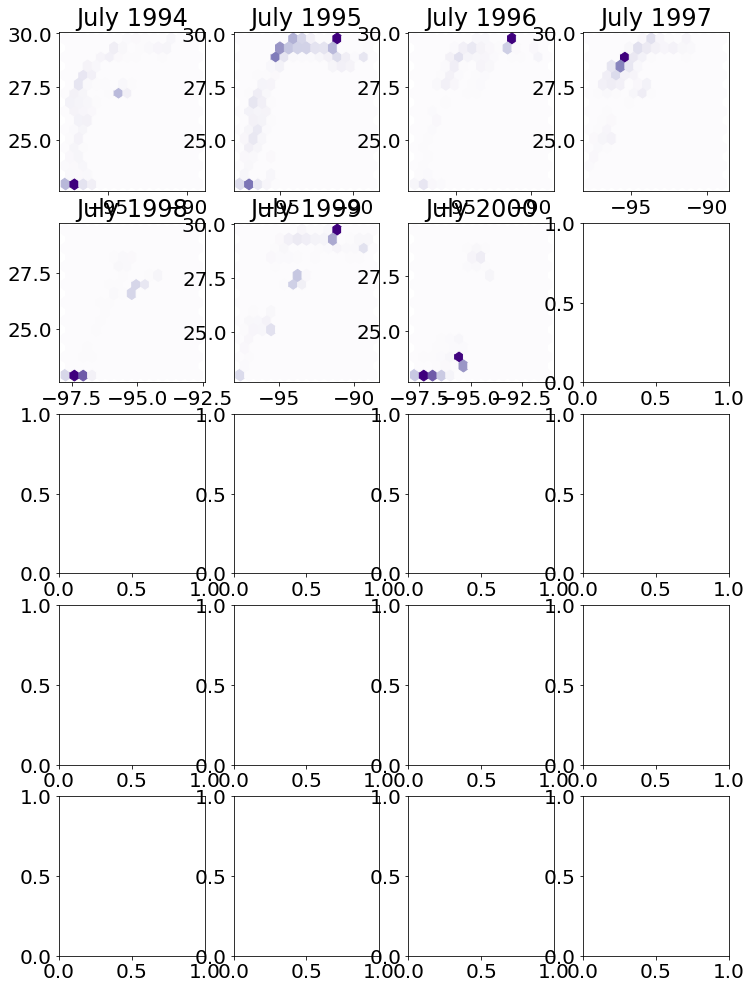

In [15]:
fig, axes = plt.subplots(5, 4, figsize=(12, 17))

for i, ax in enumerate(axes.flat):
    if i > 6: break   # don't have files for 1999 yet
    year = i + 1994
    ax.hexbin(lons[year],lats[year],gridsize=15,cmap='Purples')
    ax.set_title("July " + str(year),size=24)
    
#axes[2][0].colors.Colormap("red")
#plt.show()

In [36]:
proj = tracpy.tools.make_proj('nwgom-pyproj')
x96, y96 = proj(lons[1996],lats[1996])

In [39]:
def finalhist(lon, lat, Title="test", bins=(40, 40)):
    # takes in list of ending locations in (lon and lat) projections

    cmap = 'BuPu'

    # Info for 2d histogram
    H, xedges, yedges = np.histogram2d(lon, lat, 
                                       range=[[-422893.1840546361, 607114.2511548102],
                                              [-773600.0225372436, 105158.33625709431]],
                                       bins=bins)

    # Contour Plot
    XE, YE = np.meshgrid(op.resize(xedges, 0), op.resize(yedges, 0))
    d = (H/H.sum())*100
    # # from http://matplotlib.1069221.n5.nabble.com/question-about-contours-and-clim-td21111.html
    # locator = ticker.MaxNLocator(50) # if you want no more than 10 contours
    # locator.create_dummy_axis()
    # locator.set_bounds(0,1)#d.min(),d.max())
    # levs = locator()
    con = ax.contourf(XE, YE, d.T, 10, transform=ccrs.LambertConformal())  # ,levels=levs)#(0,15,30,45,60,75,90,105,120))
    con.set_cmap(cmap)

    ax.set_title(Title)

    # Horizontal colorbar below plot
    cax = fig.add_axes([0.35, 0.25, 0.6, 0.02])  # colorbar axes
    cb = fig.colorbar(con, cax=cax, orientation='vertical')
    cb.set_label('Final drifter location (percent)')

    # Save figure into a local directory called figures. Make directory
    # if it doesn't exist.
#     if not os.path.exists('figures'):
#         os.makedirs('figures')

#     fig.savefig('figures/' + fname + 'histcon.png', bbox_inches='tight')


In [40]:
finalhist(lons[1995], lats[1995], Title="1995")

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

In [4]:
fname = "tracks/test3d_1994July1.nc"
d=netCDF.Dataset(fname)
lonp = d['lonp'][:]   # lonp[drifter][hour]
latp = d['latp'][:]
zp = d['zp'][:]

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


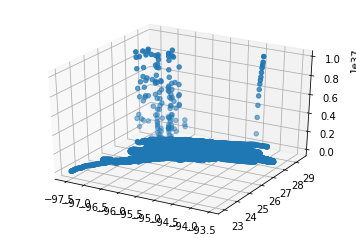

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lonp[0:206,:720],latp[0:206,:720],zp[0:206,:720])


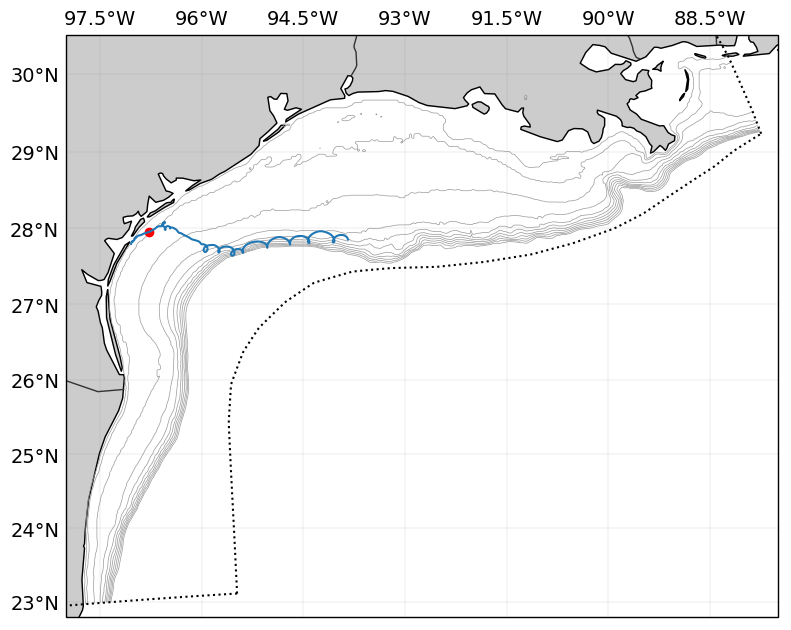

In [97]:
# print(lonp[0:206,:],latp[0:206,:],zp[0:206,:])
# print()
# print()
# print(lonp[206:412,:],latp[206:412,:],zp[206:412,:])
# print()
# print()


loc = 'http://copano.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg'
proj = tracpy.tools.make_proj('nwgom-pyproj')
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

fig = plt.figure(figsize=(9.4, 7.7), dpi=100)
fig, ax = tracpy.plotting.background(grid, fig=fig, extent=[-98, -87.5, 22.8, 30.5],
               col='lightgrey', halpha=1, outline=[1, 1, 0, 1], res='50m')
#tracpy.plotting.tracks(lonp[1,:],latp[1,:] tp.name, grid, fig=fig, ax=ax)

ax.plot(lonp[140,400],latp[140,400],"ro",transform=ccrs.PlateCarree())
ax.plot(lonp[140,:],latp[140,:],transform=ccrs.PlateCarree())



In [96]:
print(zp[140,400:500])
print(lonp[140,400:500])
print(latp[140,400:500])

[-0.347916026553843 -0.34656775176010446 9.658005041006877e+35
 1.2848444407837733e+36 -0.34482829804327986 3.465272910868726e+35 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -3062.4435312131072 nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
[-96.77954695 -96.78528858 -96.79216327 -96.79954479 -96.80663225
 -96.81315606 -96.82086869 -96.83023276 -96.84065408 -96.85043817
 -96.85973591 -96.86907947 -96.87791801 -96.88613677 -96.89398472
 -96.90167417 -96.91068547 -96.91929835 -96.92814364 -96.9368284
 -96.94485284 -96.95238358 -96.95836049 -96.96235829 -96.96463031
 -96.96544991 -96.96615382 -96.96675342 -96.96627768 -96.96582504
 -96.9660198  -96.96704576 -96.96811114 -96.96914616 -96.97014022
 -96.97132675 -96.97304135 -96.975254   -96.97796121 -96.98092079
 -96.983706

In [80]:
zp[0,-500:]

masked_array(data=[-0.19667253558901385, -0.19754402255053058,
                   -0.1984953288251732, -0.19935257918364044,
                   -0.20013728517123913, -0.20049824846354314,
                   -0.20052177334021842, -0.2002428388109496,
                   -0.19985179842081466, -0.20027684475548524,
                   -0.20165675038740055, -0.20377581394022184,
                   -0.20552421219686293, -0.20729910297713638,
                   -0.21245247414803475, -0.21742389704607767,
                   -0.22167091199630443, -0.2244193919703948,
                   -0.225794273930762, -0.22540046226619506,
                   -0.22340423520701888, -0.22010377325456382,
                   -0.2176024828039168, -0.21564916600055278,
                   -0.21333212173389338, -0.21173929695672744,
                   -0.21029509627079251, -0.20894707709827032,
                   -0.2079243544193806, -0.20714065667545953,
                   -0.20723947878814197, -0.2069643014511729,


In [89]:
for i in range(0,206):
    print('\n' + str(i))
    print(np.where(zp[i,:] > 1e10))



0
(array([], dtype=int64),)

1
(array([ 797,  798,  799,  800,  801,  802,  803,  804,  805,  806,  807,
        808,  809,  810,  811,  812,  813,  814,  815,  816,  818,  819,
        820, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1162, 1163, 1164, 1166, 1167, 1168, 1169, 1170, 1171, 1172,
       1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183,
       1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194,
       1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205,
       1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216,
       1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227,
       1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238,
       1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249,
       1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260,
       1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271,
       1272, 1273,

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
print(lonp[140,0])
print(latp[140,0])
print(zp[140,0])

-93.84035973662138
27.855909561531536
nan


In [ ]:
# 203 at 384